In [3]:
import SimpleITK as sitk
import os

fmhd=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/02-export/cachedata_0.mhd"

def readMhdFile(ifname:str):
    reader = sitk.ImageFileReader()
    reader.SetImageIO("MetaImageIO")
    reader.SetFileName(ifname)
    image = reader.Execute()
    return image



In [ ]:
img=readMhdFile(fmhd)
viewer = sitk.ImageViewer()
viewer.SetCommand('/usr/bin/imagej')
if "SITK_NOSHOW" not in os.environ:
    sitk.Show(img, debugOn=True)

In [ ]:
print(img)

array-shape=(74, 2000, 255)
image-shape=(2000, 255)
line01 shape=(2000,)
array-shape=(74, 2000, 255)
image-shape=(2000, 255)
array-shape=(74, 2000, 255)
image-shape=(2000, 255)


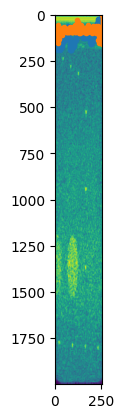

In [65]:
#ref: https://github.com/tueimage/essential-skills/blob/master/medical-images.md
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def readExportMhd(fmhd:str, imgIdx=0):
    itk_image = sitk.ReadImage(fmhd)
    image_array = sitk.GetArrayViewFromImage(itk_image)
    # print the image's dimensions
    print(f"array-shape={image_array.shape}")
    oneImgdata=image_array[imgIdx,:,:]
    print(f"image-shape={oneImgdata.shape}")
    # plot the image
    #plt.imshow(oneImgdata.transpose())#, cmap='gray'
    return oneImgdata.copy()

def readOneImageScanline(fmhd:str, imgIdx=0, sclIdx=0):
    img=readExportMhd(fmhd)
    line01=img[:,imgIdx] if len(img.shape) > 1 else img
    return line01.copy()


def drawfirstLineMHD(fmhd:str):
    line01=readOneImageScanline(fmhd)
    print(f"line01 shape={line01.shape}")
    plt.plot(line01,  ".-")
    return

def draw3columnlineConbine(fmhd:str,lineIdx=0):
    oneImgdata=readExportMhd(fmhd)
    combine4=np.concatenate((oneImgdata[lineIdx,:],oneImgdata[lineIdx+1,:],oneImgdata[lineIdx+2,:],oneImgdata[lineIdx+3,:])) 
    plt.plot(combine4, ".-")

refmhd=r"/home/iiva/workplace/33-analyse-datas/mhd_output_0.mhd"
drawfirstLineMHD(refmhd)
draw3columnlineConbine(refmhd)
img0=readExportMhd(refmhd)
plt.imshow(img0)

array-shape=(5, 1792, 512)
image-shape=(1792, 512)
line01 shape=(1792,)
array-shape=(5, 1792, 512)
image-shape=(1792, 512)


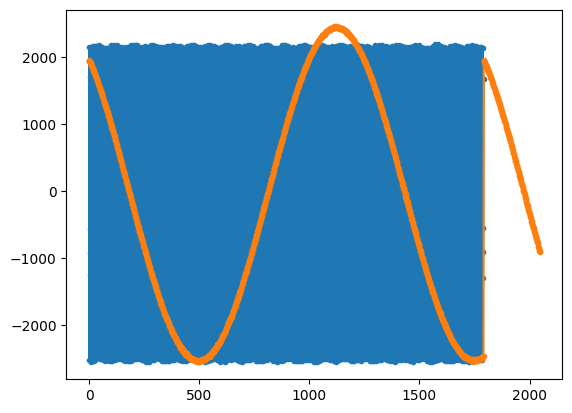

In [51]:
fmhd28=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/02-export/231128-modify/cachedata_0.mhd"
drawfirstLineMHD(fmhd28)
draw3columnlineConbine(fmhd28)
img0=readExportMhd(fmhd_directIO)
plt.imshow(img0)

array-shape=(38, 1792, 512)
image-shape=(1792, 512)
line01 shape=(1792,)
array-shape=(38, 1792, 512)
image-shape=(1792, 512)


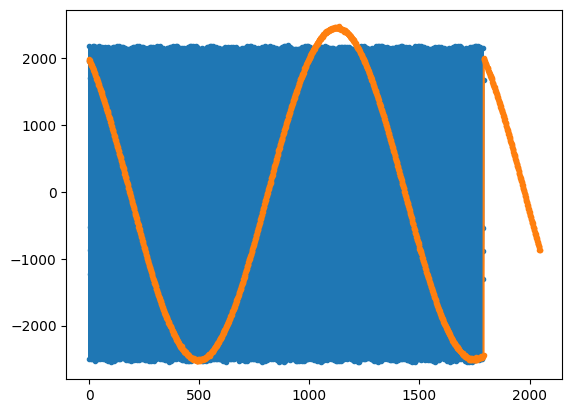

In [62]:
fmhd_directIO=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/02-export/231128-modify/mhd_output_0.mhd"
drawfirstLineMHD(fmhd_directIO)
draw3columnlineConbine(fmhd_directIO, 7)


array-shape=(3, 1792, 512)
image-shape=(1792, 512)
line01 shape=(1792,)
array-shape=(3, 1792, 512)
image-shape=(1792, 512)


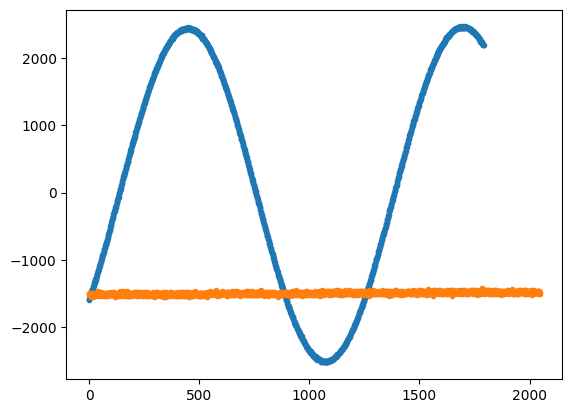

In [64]:
afterRowmhd=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/02-export/231128-modify/after-row-major/mhd_output_0.mhd"
drawfirstLineMHD(afterRowmhd)
draw3columnlineConbine(afterRowmhd, 7)

array-shape=(3, 1792, 512)
image-shape=(1792, 512)


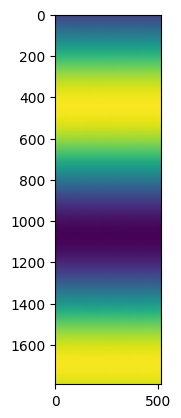

In [66]:
img0=readExportMhd(afterRowmhd)
plt.imshow(img0)

In [ ]:
def readExportMhd2(fmhd:str):
    itk_image = sitk.ReadImage(fmhd)
    image_array = sitk.GetArrayViewFromImage(itk_image)
    # print the image's dimensions
    print(f"array-shape={image_array.shape}")
    oneImgdata=image_array[1,:,:]
    print(f"image-shape={oneImgdata.shape}")
    # plot the image
    #plt.imshow(oneImgdata.transpose())#, cmap='gray'
    oneImgdataT=oneImgdata.transpose()
    print(f"imageT-shape={oneImgdataT.shape}")
    lineIdx=0
    combine4=np.concatenate((oneImgdata[lineIdx,:],oneImgdata[lineIdx+1,:],oneImgdata[lineIdx+2,:],oneImgdata[lineIdx+3,:])) #,oneImgdata[2,:],oneImgdata[3,:]
    print(f"imageT line shape={oneImgdataT[lineIdx,:].shape}, combine4={combine4.shape}")
    plt.plot(combine4, ".-")
    plt.show()
    #return oneImgdata.copy()
    return combine4.copy()

array-shape=(5, 1792, 512)
image-shape=(1792, 512)


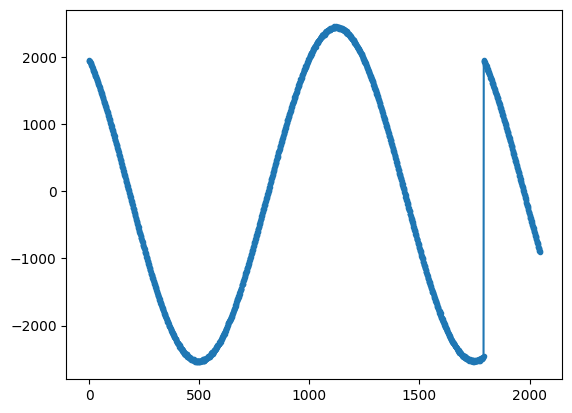

In [38]:


show3lineConbine()

array-shape=(5, 1792, 512)
image-shape=(1792, 512)
img shape=(1792, 512), line01 shape=(100,)


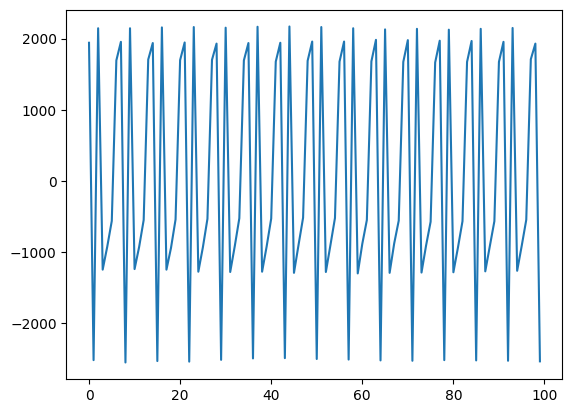

In [40]:
import matplotlib.pyplot as plt

fmhd=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/02-export/cachedata_0.mhd"
fmhd=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/02-export/231128-modify/cachedata_0.mhd"
img=readExportMhd(fmhd)
line01=img[:100,0] if len(img.shape) > 1 else img
print(f"img shape={img.shape}, line01 shape={line01.shape}")

plt.plot(line01)
#plt.imshow(img)

array-shape=(74, 2000, 255)
image-shape=(2000, 255)
imageT-shape=(255, 2000)
imageT line shape=(2000,), combine4=(1020,)
img shape=(2000, 255), line01 shape=(2000,)


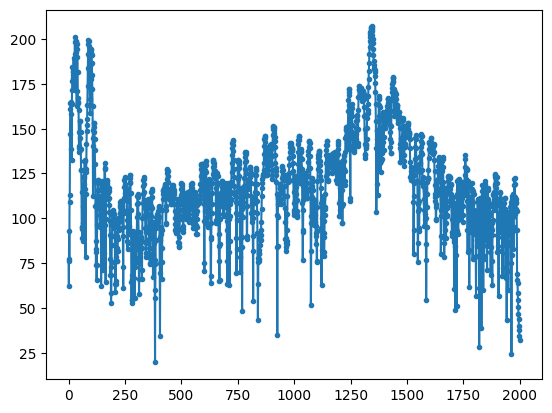

In [7]:
refmhd=r"/home/iiva/workplace/33-analyse-datas/mhd_output_0.mhd"
img=readExportMhd(refmhd)
line01=img[:,76]
print(f"img shape={img.shape}, line01 shape={line01.shape}")

plt.plot(line01,  ".-")
#plt.imshow(img)

array-shape=(74, 2000, 255)
image-shape=(2000, 255)


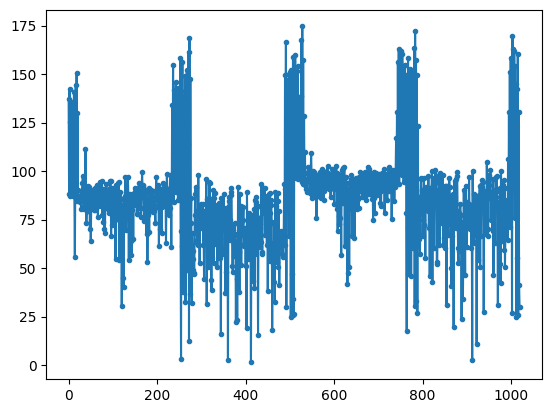

In [41]:
def show3lineConbine(lineIdx=0):
    fmhd=r"/home/iiva/workplace/33-analyse-datas/mhd_output_0.mhd"
    oneImgdata=readExportMhd(fmhd)
    combine4=np.concatenate((oneImgdata[lineIdx,:],oneImgdata[lineIdx+1,:],oneImgdata[lineIdx+2,:],oneImgdata[lineIdx+3,:])) 
    plt.plot(combine4, ".-")

show3lineConbine()

max=2459, min=-2569, first 20 datas=[1966 1941 1962 1941 1937 1925 1917 1913 1901 1896 1872 1884 1880 1868
 1848 1848 1839 1835 1819 1803].


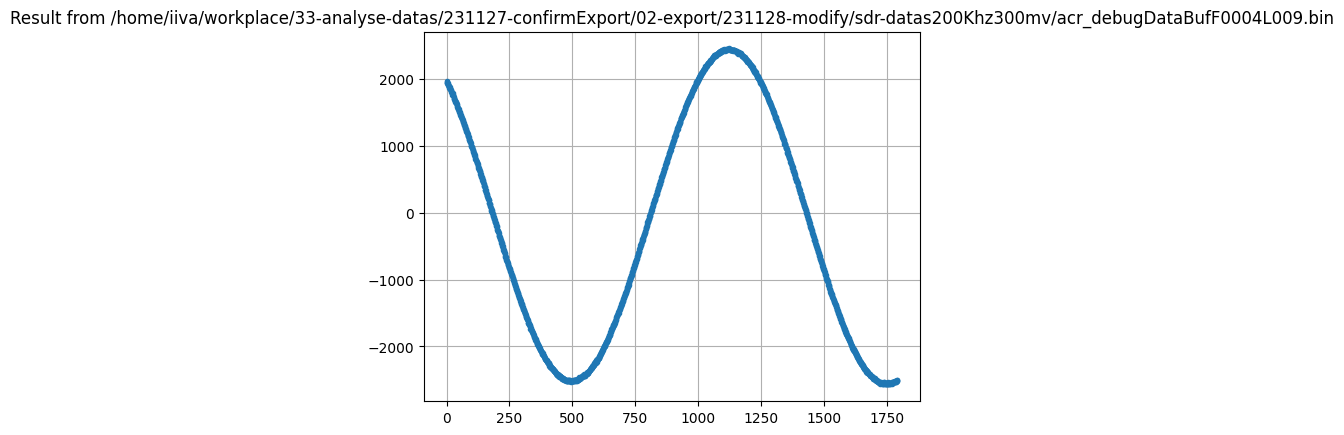

In [12]:
import numpy as np

import matplotlib.pyplot as plt
import sys
binary_dtype = "int32"
def readSDR(filename:str):
    try:
        data = np.fromfile(filename, dtype=binary_dtype)
    except (UnicodeDecodeError, UnicodeEncodeError, ValueError):
        # The data is probably binary. Decode according to specified dtype.
        data = np.loadtxt(filename)
    except FileNotFoundError as e:
        print("WARNING: '{}' not found".format(e.filename))
    print(f"max={max(data)}, min={min(data)}, first 20 datas={data[0:20]}.")

    plt.plot(data, ".-")
    plt.title("Result from {}".format(filename))
    plt.grid(which="both")
    plt.show()
sdrf03l01=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/01-datas/acr_debugDataBufF0003L001.bin"
sdrf03l09=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/02-export/231128-modify/sdr-datas200Khz300mv/acr_debugDataBufF0004L009.bin"
readSDR(sdrf03l09)

max=759, min=-926, first 20 datas=[510 498 506 485 481 498 469 477 490 473 485 481 473 461 465 453 457 453
 457 441].


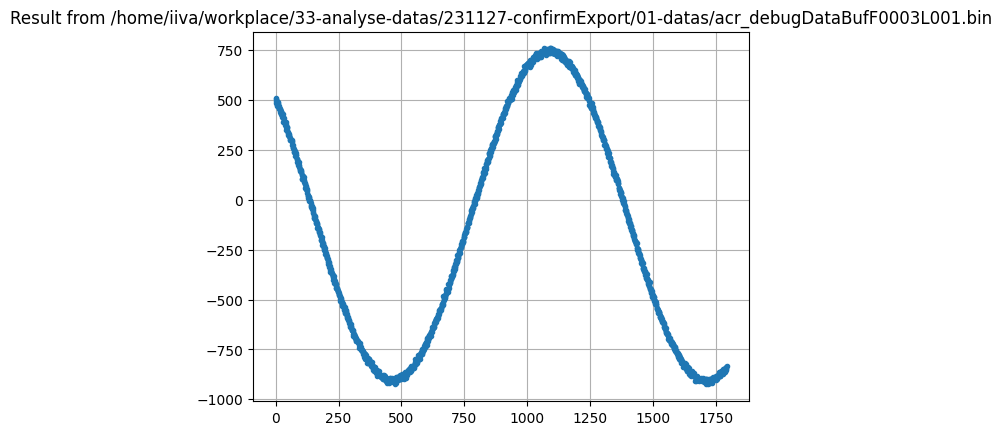

In [24]:
sdrf03l01=r"/home/iiva/workplace/33-analyse-datas/231127-confirmExport/01-datas/acr_debugDataBufF0003L001.bin"
readSDR(sdrf03l01)

In [19]:
n1=np.array([[1,2,3,4],[5,6,7,8]])
n2=n1.transpose()
print(f"shape:\tn1={n1.shape}, \n\tn2={n2.shape}")
print(f"n1={n1}, \nn2={n2}")

shape:	n1=(2, 4), 
	n2=(4, 2)
n1=[[1 2 3 4]
 [5 6 7 8]], 
n2=[[1 5]
 [2 6]
 [3 7]
 [4 8]]


In [20]:
print(n2[:,0])

[1 2 3 4]
